In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sys
import math

In [13]:
def plot_multiple_histories(history_paths, model_names=None, window=10):
    """
    Plot episode reward histories for multiple models in a 2×2 grid.

    Parameters
    ----------
    history_paths : list[str]
        List of file paths to the pickle history files.

    model_names : list[str] or None
        Names to use for subplot titles. If None, filenames will be used.

    window : int
        Moving-average window size.
    """
    n = len(history_paths)
    if model_names is None:
        model_names = [f"Model {i+1}" for i in range(n)]

    # Determine subplot layout
    cols = 2
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    axes = axes.flatten()  # make it indexable as a 1D list

    for i, (path, name) in enumerate(zip(history_paths, model_names)):
        ax = axes[i]

        # Load history
        with open(path, "rb") as f:
            hist = pickle.load(f)

        rewards = hist.get("episode_rewards", None)
        if rewards is None:
            rewards = hist.get("rewards", None)
        if rewards is None:
            raise KeyError(
                f"History file '{path}' does not contain 'episode_rewards' or 'rewards'"
            )
        ax.plot(rewards, alpha=0.7, label="Episode Reward")

        # Moving average
        if len(rewards) >= window:
            ma = np.convolve(rewards, np.ones(window)/window, mode="valid")
            ax.plot(range(window-1, len(rewards)), ma, color="red", linewidth=2,
                    label=f"{window}-episode MA")

        ax.set_title(name)
        ax.set_xlabel("Episode")
        ax.set_ylabel("Reward")
        ax.grid(alpha=0.3)
        ax.legend()

    # Hide any unused subplots (if <4 passed)
    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    fig.tight_layout()
    plt.savefig("comparison_rewards_history.png", dpi=300, bbox_inches="tight")
    plt.show()

In [16]:
tile_q_path = "../model/tileq_training_history.pkl"
dqn_path = "../model/dqn_training_history.pkl"
mmc_path = "../model/mmc_training_history.pkl"
ppo_path = "../model/ppo_training_history.pkl"


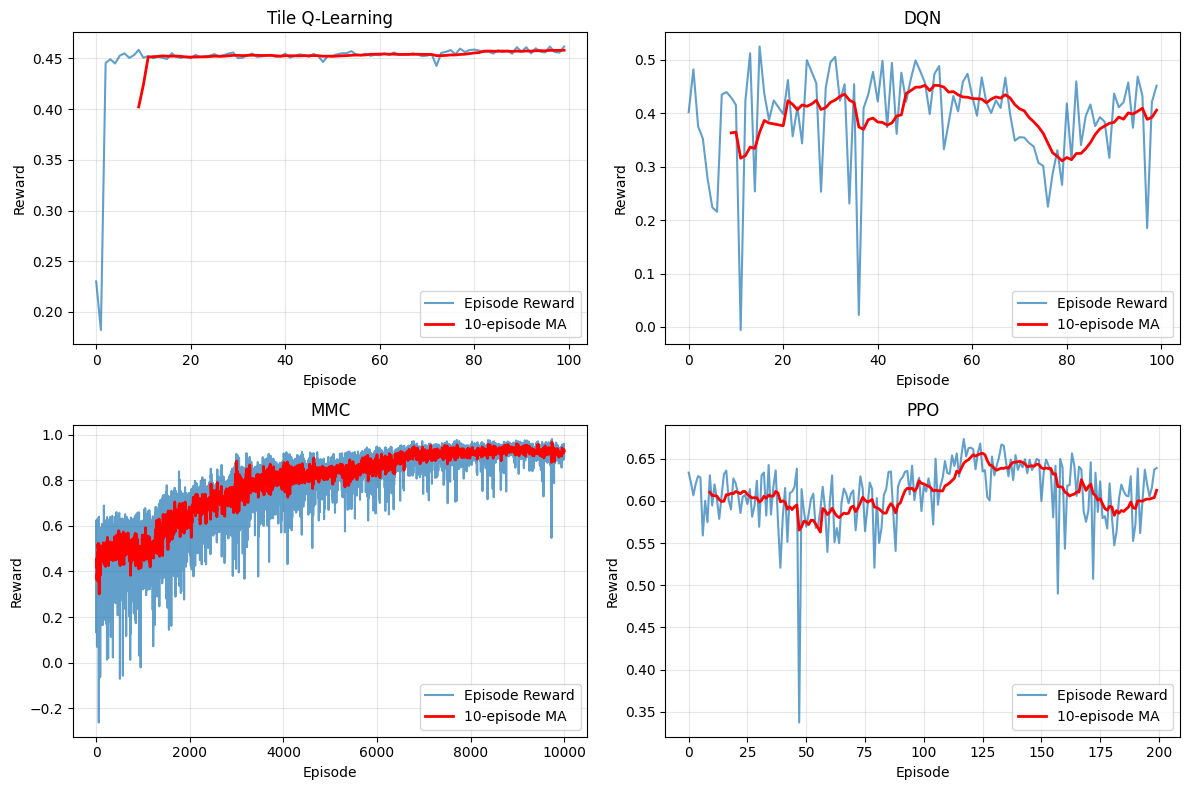

In [17]:
plot_multiple_histories([tile_q_path, dqn_path, mmc_path, ppo_path],
                        model_names=["Tile Q-Learning", "DQN", "MMC", "PPO"])